### Capstone: Intermediate Data Science with Python
In this project we will examine which features buyers prefer over others in the Washington D.C. residential dataset. Of particular interest is the question: do buyers prefer different features (or houses) at different times of year? Also, does proximity to townhomes increase residential value? Which 20-year period produced buildings of the least value (I hypothesize 1965-1985)?

For the ML aspect, I would like to read features of a house and predict its neighborhood and/or price.
Another question would be "What are the most valuable features on the houses?"

Decision Tree: predict neighborhood

Decision Tree Regression: predict year built and/or price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline
df=pd.read_csv("../dc-residential-properties/DC2R.csv", index_col=0)

In [2]:
#Some Basic EDA:
df.describe()

,BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,STORIES,PRICE,GBA,KITCHENS,FIREPLACES,LANDAREA
count,106696.000000,106696.000000,106696.000000,106696.000000,106455.000000,106652.000000,5.790000e+04,106696.000000,106695.000000,106696.000000,106696.000000
mean,2.033103,1.198039,7.382329,3.368514,1933.888413,2.091793,5.799119e+05,1714.539889,1.219251,0.621551,3416.584089
std,1.062017,0.596924,2.295587,1.100649,28.307306,2.933323,6.076454e+05,880.677860,0.621170,0.895054,5939.778843
min,0.000000,0.000000,0.000000,0.000000,1754.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.000000,3.000000,1914.000000,2.000000,2.400000e+05,1190.000000,1.000000,0.000000,1600.000000
50%,2.000000,1.000000,7.000000,3.000000,1930.000000,2.000000,4.400000e+05,1480.000000,1.000000,0.000000,2365.000000
75%,3.000000,1.000000,8.000000,4.000000,1947.000000,2.000000,7.500000e+05,1966.000000,1.000000,1.000000,4200.000000
max,14.000000,6.000000,48.000000,24.000000,2019.000000,826.000000,2.510000e+07,45384.000000,44.000000,13.000000,942632.000000


In [3]:
print(df.shape)
print(df.head())

(106696, 16)
   BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  STORIES  \
0       4      Warm Cool  Y          2      8      4  1910.0      3.0   
1       3      Warm Cool  Y          2     11      5  1898.0      3.0   
2       3  Hot Water Rad  Y          2      9      5  1910.0      3.0   
3       3  Hot Water Rad  Y          2      8      5  1900.0      3.0   
4       2      Warm Cool  Y          1     11      3  1913.0      3.0   

       PRICE   GBA         STRUCT        ROOF  KITCHENS  FIREPLACES  LANDAREA  \
0  1095000.0  2522     Row Inside  Metal- Sms       2.0           5      1680   
1        NaN  2567     Row Inside    Built Up       2.0           4      1680   
2  2100000.0  2522     Row Inside    Built Up       2.0           4      1680   
3  1602000.0  2484     Row Inside    Built Up       2.0           3      1680   
4        NaN  5255  Semi-Detached     Neopren       1.0           0      2032   

  ASSESSMENT_NBHD  
0      Old City 2  
1      Old City 2  
2

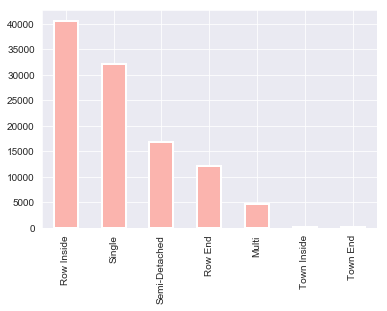

In [2]:
df['STRUCT']=df['STRUCT'].astype(str)
df= df[~df.STRUCT.str.contains("nan")]
df= df[~df.STRUCT.str.contains("Default")]
df= df[~df.STRUCT.str.contains("Vacant Land")]


df['STRUCT'].value_counts().plot(kind='bar',linewidth=2,colormap='Pastel1') 

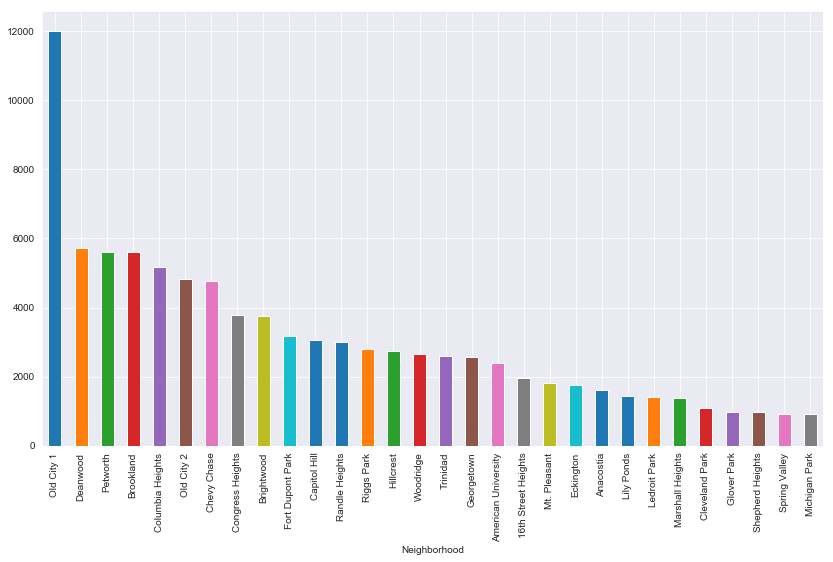

In [3]:
#Make sure to drop smallest neighborhoods
df['ASSESSMENT_NBHD']=df['ASSESSMENT_NBHD'].astype(str)
df=df[~df.ASSESSMENT_NBHD.str.contains("Woodley")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Foggy Bottom")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Observatory Circle")]
df=df[~df.ASSESSMENT_NBHD.str.contains("nan")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Wesley Heights")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Hawthorne")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Central-tri 1")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Massachusetts Avenue Heights")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Southwest Waterfront")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Barry Farms")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Foxhall")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Wakefield")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Garfield")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Fort Lincoln")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Colonial Village")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Berkley")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Brentwood")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Kalorama")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Crestwood")]
df=df[~df.ASSESSMENT_NBHD.str.contains("North Cleveland Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Burleith")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Forest Hills")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Rock Creek Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Kent")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Takoma Park")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Chillum")]
df=df[~df.ASSESSMENT_NBHD.str.contains("Palisades")]



df['PPSQ']=df['PRICE']/df['GBA']
#nbhd=df1['ASSESSMENT_NBHD'].astype(float)

#nbhd=[df1['ASSESSMENT_NBHD']=='Old City 1','Deanwood','Petworth','Brookland','Old City 2','Columbia Heights','Chevy Chase','Congress Heights','Brightwood','Fort Dupont Park','Capitol Hill','Ridge Park','Hillcrest','Woodridge','Trinidad']
#'Old City 1'|'Deanwood'|'Petworth'|'Brookland'|'Old City 2'|'Columbia Heights'|'Chevy Chase'|'Congress Heights'|'Brightwood'|'Fort Dupont Park'|'Capitol Hill'|'Ridge Park'|'Hillcrest'|'Woodridge'|'Trinidad'
#'Old City 1','Deanwood','Petworth','Brookland','Old City 2','Columbia Heights','Chevy Chase','Congress Heights','Brightwood','Fort Dupont Park','Capitol Hill','Ridge Park','Hillcrest','Woodridge','Trinidad'
plt.figure(figsize=(14,8))
plt.xlabel('Neighborhood')
#.value_counts()
df['ASSESSMENT_NBHD'].value_counts().plot(kind='bar')
plt.show()

In [4]:
#preprocessing data
import sklearn.preprocessing as prep
#df1=df.drop(['PRICE'], axis=1)
df1=df.dropna()
X1=df1[['AYB','ROOF', 'GBA', 'ASSESSMENT_NBHD', 'HEAT']]
y=df1['STRUCT']
le = prep.LabelEncoder()
le.fit(y)
print(le.classes_)
Z=le.transform(y)
print(len(df1))
enc= prep.OneHotEncoder(handle_unknown='ignore')
enc.fit(X1)
X2= enc.transform(X1)

['Multi' 'Row End' 'Row Inside' 'Semi-Detached' 'Single' 'Town End'
 'Town Inside']
49835


In [5]:
#grouped =df1.groupby('ASSESSMENT_NBHD',sort=True).value_counts()
#grouped=grouped.sort_index(ascending=False)
#grouped.head(10)

#df2=df.sort_values(by=['ASSESSMENT_NBHD'].value_counts(), ascending=False)
#df2.head()
#df1['count'] = df1.groupby('ASSESSMENT_NBHD')['ASSESSMENT_NBHD'].transform(pd.Series.value_counts)
#df.sort('count', ascending=False)
#df.drop('count', axis=1)
df2=df1.assign(freq=df1.groupby('ASSESSMENT_NBHD')['ASSESSMENT_NBHD'].transform('count')).sort_values(by=['freq','ASSESSMENT_NBHD'],ascending=[False,True]).loc[:,['ASSESSMENT_NBHD']]

df2.head()
#df2.tail()

,ASSESSMENT_NBHD
1156,Old City 1
1157,Old City 1
1158,Old City 1
1160,Old City 1
1162,Old City 1


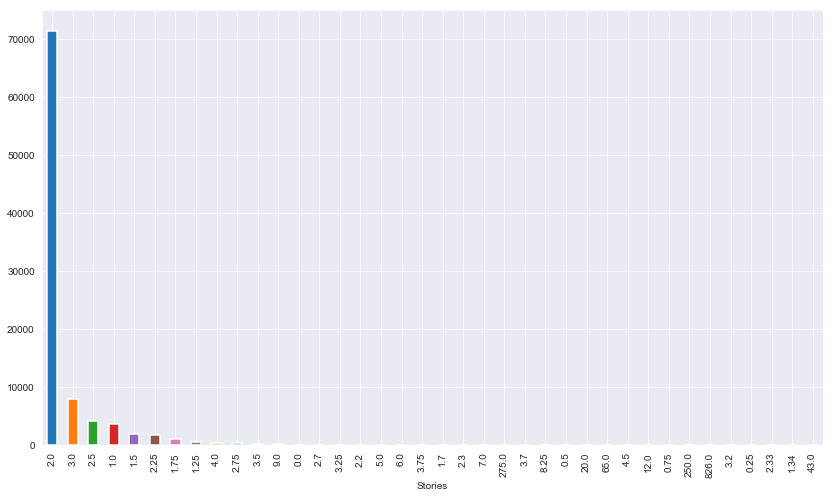

In [6]:
plt.figure(figsize=(14,8))
plt.xlabel('Stories')
df['STORIES'].value_counts().plot(kind='bar', linewidth=1.5)
plt.show()
#Clearly most buildings are 2 stories.

### Classifying neighborhoods in DC


In [10]:
import seaborn as sns
#sns.barplot(x='ASSESSMENT_NBHD',y='PRICE',data=df1, hue="STRUCT")
df1.NBHD = df1.ASSESSMENT_NBHD=='Old City 1','Deanwood','Petworth','Brookland','Old City 2','Columbia Heights','Chevy Chase','Congress Heights','Brightwood','Fort Dupont Park','Capitol Hill','Ridge Park','Hillcrest','Woodridge','Trinidad'
pd.crosstab(df1.STRUCT, df1.NBHD).plot(kind='bar',stacked=True, colormap='Paired');
#plt.plot(x=df.STRUCT, height=kind='bar', stacked=True)

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: can only concatenate list (not "tuple") to list

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf = DecisionTreeClassifier(criterion="entropy")
X_train, X_test, y_train, y_test = train_test_split(X2,Z,test_size=0.3)

clf.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))
#print(clf.get_params())

scores = cross_val_score(clf, X2, Z, cv=5)
print(scores)


0.7444986957394154
[0.56950853 0.62841091 0.44531407 0.39815372 0.18876066]


In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test= train_test_split(X2, Z, test_size=0.3)
model = xgb.XGBClassifier(n_estimators=5, max_depth=5,objective='multi:softmax',max_features=0.8, min_samples_leaf= 0.04)
model.fit(X_train, y_train)
preds = model.predict(X_test)
predictions = [round(value) for value in preds]
xgb_param = model.get_xgb_params()
xgb_param['num_class'] = 43

XZ=xgb.DMatrix(X2,label=Z)

cvresults = xgb.cv(params=xgb_param,dtrain=XZ, num_boost_round=5)

print(cross_val_score(model, X2, Z, cv=5))
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
print(model.get_params())

[0.63821464 0.69151284 0.57635962 0.62753361 0.34781736]
accuracy: 0.691392
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 5, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [ ]:
# k-fold cross validation evaluation of xgboost model
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split data into X and y
X = X2
Y = Z
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [71]:
from sklearn.model_selection import GridSearchCV

params_dt = {
                     'max_depth': [3, 4,5, 6],
                     'min_samples_leaf': [0.04, 0.06, 0.08],
                     'max_features': [0.2, 0.4,0.6, 0.8]
                     }

grid_dt = GridSearchCV(estimator=clf, 
                               param_grid=params_dt,
                               scoring='accuracy',                       
                               cv=5,
                               n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)


C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


MemoryError: 

### Regression 


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

yr= df1['PRICE']
Xr=df1[['STORIES','GBA', 'AYB','ASSESSMENT_NBHD']]

enc= prep.OneHotEncoder(handle_unknown='ignore')
enc.fit(Xr)
Xr= enc.transform(Xr)
le = prep.LabelEncoder()
le.fit(yr)
yr=le.transform(yr)
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13,)

X_train, X_test, y_train, y_test= train_test_split(Xr, yr,test_size=0.3)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
negmse=metrics.make_scorer(MSE, greater_is_better=False, needs_proba=False, needs_threshold=False) 
scores = cross_val_score(dt, Xr, yr, cv=5, scoring=negmse)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Test set RMSE of dt: 2020.82


In [19]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
# Predict test set labels 
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**0.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

print(df['PRICE'].min())
print(df['PRICE'].max())

Linear Regression test set RMSE: 1598.73
Regression Tree test set RMSE: 2010.84
1.0
25100000.0


In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)
logreg.predict(X_test)

C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alehe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
